<a href="https://colab.research.google.com/github/ksuaray/F23_697LAEP/blob/main/F23_Ed_Analytics_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Clasification
* Something you want to predict and can be categorical where the answer is a set of categories not a number
* A binary response is a correct/wrong type of response, often it is 0-1 where the response cannot lie between 0 or 1. This answer is like a yes/no type
* There are many classification algorithms such as XG boose or Neural networks. MOst popular is logistic regression, decision trees, xgboost, random forest, etc.

Lets discuss the types of classifications:
  * Step Regression is used for binary classification (0,1). We fit a linear regression fxn with a cut off.
      * All values below 0.5 is treated as 0, equal to or greater than 0.5 is treated as 1
      * Example: Suppose you have a regression called $y=0.5A+0.7B-0.2C+0.4D+0.3$ and we have point $(A,B,C,D)=(1,1,0,0)$ then we have $y(1,1,0,0)=1.5$ and since $1.5>0.5$ which will result in a predictor of $1$ as it meets the threshold cutoff
  * Logistic Regression, given a specific set of predictor variables, fits the logistic fxn to data to find the frequency/odds of a specific value of the dependent variable
      * Example: suppose for a function
$m=a_o+a_1v_1+a_2v_2+...+a_nv_n$ where $p(m) = \dfrac{1}{1 + \exp(-m)}$. If, for say, $m=0.2A+0.3B+0.4C$ then for $(A,B,C,)=(0,0,0), m=0$ and $p(m)=0.5$
      * Also, the higher the numbers are for $(A,B,C)$ in the example above, the closer $p(m)$ will be closer to $1$
  * Random Forest:
      *Spits the data into random subsets of data points, then takes a random set of the data features, and builds a decision tree based on the resulting data set
  * XG-Boost:
    * Builds a lot of small trees(4-9) levels on optimized subsets of data and tries to iteratively figure out which combination of small trees best fit the data.


Classification
  * Something you want to predict (i.e. label), the thing you want to predict is categorical where the answer is a set of categories, not a number
Neural networks are perceptrions that take a set of inputs, has a weight of inputs, multiplies those weights by the inputs, adds it all together, adds an intercept, and then applies a step function to get a $0,1$ output: $f(x)=1$ if $w * x+b>0$ and $0$ otherwise.

Neural networks
  * Take a lot of inputs and can produce multiple outputs
  *Deep learning has multiple perceptions and hiddlen layers feeding into one another. This may work better than neural networks because deep learning captures multiple layers of abstraction, something a human can't do
  *Recurrent neural networks feed back information from later layers back to earlier layers, allowing for sequence of outputs

#WEEK 2

###Higher Ed Data Analysis: Understanding Yield

Enrollment Yield and Admissions Yield are important metrics in higher education. You can read about them [here](https://www.airweb.org/docs/default-source/documents-for-pages/reports-and-publications/the-primer-for-institutional-research-2003.pdf?sfvrsn=4150b287_2):
and
[here](https://www.crimsoneducation.org/us/blog/university-yield-rates/#:~:text=University%20yield%20rates%20refer%20to,overall%20desirability%20among%20prospective%20students.).


**Homework** Go to Kaggle and find the **IPEDS** data. Upload it into this notebook and read in the file.
1. Create two new variables for Admission Yield and Enrollment yield, and add them to the DataFrame.
2. What questions do you have of the data? Try to answer them using numerical summaries, graphs and subsetting the data.
3. We would like to predict the Yield variables you created. What predictors would you like to include? What kind of preprocessing would you recommend?


https://stackoverflow.com/questions/48366506/calculate-new-column-as-the-mean-of-other-columns-in-pandas

https://www.kaggle.com/datasets/sumithbhongale/american-university-data-ipeds-dataset

Importing the dataset

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

ipeds = pd.read_excel("IPEDS_data.xlsx")

#ipeds=pd.read_csv('/content/datasets for 697/IPEDS_singlepage.csv')
ipeds.head()


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [ ]:
#Inserting the new variable for admission yield (called admit_yield) and add column to dataframe
position_to_insert=24
column_name='admit_yield'
#ipeds.insert(position_to_insert,column_name,None)
ipeds['admit_yield']=(ipeds['Admissions total']/ipeds['Applicants total'])*100
ipeds.head()

##Inserting the new variable for admission yield (called enroll_yield) and add column to dataframe
position_to_insert=25
column_name='enroll_yield'
#ipeds.insert(position_to_insert,column_name,None)
ipeds['enroll_yield']=(ipeds['Enrolled total']/ipeds['Admissions total'])*100
ipeds.head()


,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [ ]:
ipeds.head()

# Which colleges have the best graduation rates within 4,5,6 years




In [ ]:
#Which universities have the best graduation rates
#Within 4 years
ipeds[ipeds['Graduation rate - Bachelor degree within 4 years, total'] > 80].sort_values('Name').head(50)

top_4years = ipeds[ipeds['Graduation rate - Bachelor degree within 4 years, total'] > 80]
top_4years[['Name', 'Graduation rate - Bachelor degree within 4 years, total']]

# Filter and display the top 10 universities with the highest graduation rates within 6 years
top_10_4years = ipeds.nlargest(10, 'Graduation rate - Bachelor degree within 4 years, total', keep='all')
result_df = top_10_4years[['Name', 'Graduation rate - Bachelor degree within 4 years, total']]

result_df

,Name,"Graduation rate - Bachelor degree within 4 years, total"
95,Coleman University,100.0
1332,Stevens-Henager College-Ogden,100.0
124,Pomona College,93.0
1092,Haverford College,91.0
179,Yale University,90.0
367,University of Notre Dame,90.0
577,Williams College,90.0
625,Carleton College,90.0
816,Hamilton College,90.0
897,Vassar College,90.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *['Graduation rate - Bachelor degree within 4 years, total'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *['Graduation rate - Bachelor degree within 4 years, total'], **{})
chart

In [ ]:
#Within 5 years
ipeds[ipeds['Graduation rate - Bachelor degree within 5 years, total'] > 80].sort_values('Name').head(50)
top_5years = ipeds[ipeds['Graduation rate - Bachelor degree within 5 years, total'] > 80]
top_5years[['Name', 'Graduation rate - Bachelor degree within 5 years, total']]


In [ ]:
#Within 6 years
ipeds[ipeds['Graduation rate - Bachelor degree within 6 years, total'] > 80].sort_values('Name').head(50)
top_6years = ipeds[ipeds['Graduation rate - Bachelor degree within 6 years, total'] > 80]
top_6years[['Name', 'Graduation rate - Bachelor degree within 6 years, total']]

# Which universities have the worst graduation rates within 5 years
  These are likely for-profit colleges

In [ ]:
#Within 5 years
ipeds[ipeds['Graduation rate - Bachelor degree within 5 years, total'] <50].sort_values('Name').head(50)

bad_5years = ipeds[ipeds['Graduation rate - Bachelor degree within 5 years, total'] < 50]
bad_5years[['Name', 'Graduation rate - Bachelor degree within 5 years, total']]

# Filter and display the Bottom universities with bad 5 year graduation results
bottom_10_graduations = ipeds.nsmallest(30, 'Graduation rate - Bachelor degree within 5 years, total', keep='all')
result_df2 = bottom_10_graduations[['Name', 'Graduation rate - Bachelor degree within 5 years, total']]

result_df2

,Name,"Graduation rate - Bachelor degree within 5 years, total"
2,Amridge University,0.0
779,Northern New Mexico College,0.0
1398,City University of Seattle,0.0
1488,Baker College of Port Huron,0.0
1494,Baker College of Cadillac,0.0
1498,Baker College Center for Graduate Studies,0.0
1500,Trine University-Regional/Non-Traditional Camp...,0.0
1521,Doane College-Lincoln Grand Island and Master,0.0
505,University of Maryland-University College,2.0
532,Cambridge College,2.0


# Which Universities have more graduate enrollment than undergraduate

In [ ]:
df2=ipeds[['Name','Estimated undergraduate enrollment, total', 'Estimated graduate enrollment, total']].copy()
print(df2)

# Iterate through the DataFrame columns
for i in df2.columns:
    if i == 'Name':
        continue  # Skip the 'Name' column

    for index, row in df2.iterrows():
        undergrad_enrollment = row['Estimated undergraduate enrollment, total']
        graduate_enrollment = row['Estimated graduate enrollment, total']

        if graduate_enrollment > undergrad_enrollment:
            print(f"{row['Name']}:", "graduate enrollment of", graduate_enrollment,
            "versus an undergraduate enrollment of", undergrad_enrollment)



# Is there an association between cost and graduation

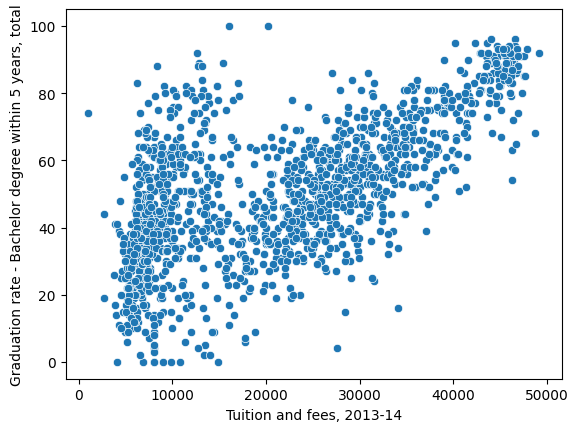

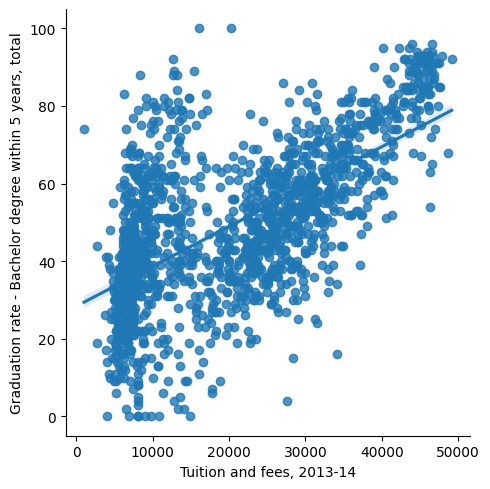

In [ ]:
import seaborn as sns
sns.scatterplot(y="Graduation rate - Bachelor degree within 5 years, total", x="Tuition and fees, 2013-14", data=ipeds);
sns.lmplot(y="Graduation rate - Bachelor degree within 5 years, total", x="Tuition and fees, 2013-14", data=ipeds);

#Try to graph this using plotly


**From the data, it is likely not as there are some universities that are cheap and have high graduation rates**

#  Which colleges are the least lucritive in terms of pass rate and cost
* For this, we will be examining the columns involving
  * Total price for out-of-state students living on campus 2013-14
  * Graduation rate - Bachelor degree within 6 years, total



In [ ]:
# Filter Rows by Condition
df3=ipeds[ipeds['Total price for out-of-state students living on campus 2013-14'] >= 35000]
df3.head()

df4=df3[df3['Graduation rate - Bachelor degree within 6 years, total']<=40]
df4.head()

#sns.lmplot(x="Graduation rate - Bachelor degree within 6 years, total", y="Tuition and fees, 2013-14", data=df4);

print(df4['Name'].to_string(index=False))



#  Which colleges are the cheapest with high graduation

---


* Similar to the previous, we will be examining the columns involving
  * Total price for out-of-state students living on campus 2013-14
  * Graduation rate - Bachelor degree within 6 years, total



In [ ]:
# Filter Rows by Condition
dff=ipeds[ipeds['Total price for out-of-state students living on campus 2013-14'] <= 20000]
dff.head()

dfx=dff[dff['Graduation rate - Bachelor degree within 6 years, total']>=60]
dfx.head()

#sns.lmplot(x="Graduation rate - Bachelor degree within 6 years, total", y="Tuition and fees, 2013-14", data=df4);

print(dfx['Name'].to_string(index=False))



United States Merchant Marine Academy
       Brigham Young University-Provo


**3. We would like to predict the yield variables you created. What predictors would you like to include? What kind of preprocessing would you recommend**

I would like to include more important information such as:

*   Applicants total
*   Admissions total
*   Standardized test score
*   Undergraduate enrollment total (full + part time)
*   Total cost for 1 year (generalized)
*   Graduation rate
*   Etc...

The less important information (such as religious affiliation, zip code, ID number,  location) should be cut off.

This dataset is very large but the preprocessing i would recommend is to clean the data and eliminate any unnecessary columns. I might then try Data Splitting: Splitting the dataset into training, validation, and test sets to evaluate the model's performance on unseen data.





###EdX Video Notes

Watch at least one video from your EdX course and take notes below. Attempt to use code and LaTeX. Be prepared to share what you learned on Monday.

# Detector Confidence

In classification, we often use a binary $0,1$ response which corresp. to a Yes/No response. But what happens in the detector if we get a response, say $50.001\%$. Is that appropriate to allocate it to $1$? This is when detector confidence is utilized

**Example**
  * In a gradated intervention:

    1.   A strong intervention if confidence is over 60%
    2.   A no intervention if confidence is under 40%
    3.   A fail-soft intervention if confidence 40-60%

